In [1]:
import pandas as pd
import numpy as np


In [2]:
train_df = pd.read_csv('dc_airbnb_train.csv')
test_df = pd.read_csv('dc_airbnb_test.csv')

## Grid Search

In [8]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

features = ['accommodates',
    'bedrooms',
    'bathrooms',
    'number_of_reviews']
hyper_params = range(1, 21)
mse_values =[]
for k in hyper_params:
    knn = KNeighborsRegressor(n_neighbors=k, algorithm='brute')
    knn.fit(train_df[features], train_df['price'])
    predictions = knn.predict(test_df[features])
    mse = mean_squared_error(predictions, test_df['price'])
    mse_values.append(mse)
print(mse_values)

[26364.928327645051, 15100.522468714449, 14578.804070281883, 15946.721060864618, 14119.735836177475, 13495.781569965869, 14209.360474565252, 14615.818988196814, 14591.371971516453, 14608.888509670078, 14747.643537453343, 14802.514876437872, 14726.607851848858, 14788.004486777645, 14775.071925167487, 14846.632372546928, 14801.420334526101, 14761.434233626876, 14750.644695086017, 14653.391259954493]


In [6]:
import matplotlib.pyplot as plt

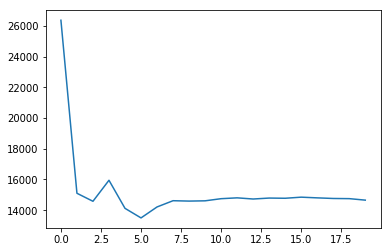

In [9]:
plt.plot(mse_values)

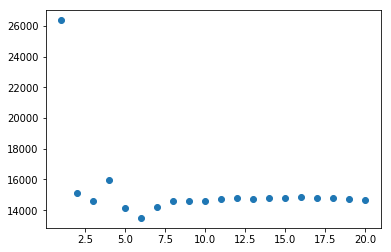

In [10]:
plt.scatter(hyper_params, mse_values)
plt.show()

In [16]:
features = train_df.columns.tolist()
features.remove('price')
hyper_params = range(1, 21)
mse_values =[]
for k in hyper_params:
    knn = KNeighborsRegressor(n_neighbors=k, algorithm='brute')
    knn.fit(train_df[features], train_df['price'])
    predictions = knn.predict(test_df[features])
    mse = mean_squared_error(predictions, test_df['price'])
    mse_values.append(mse)
print(mse_values)

[23303.759954493744, 14917.940273037542, 15006.17772721527, 15428.660409556314, 15275.559089874858, 15482.547117937047, 14958.776485338165, 15122.70925767918, 15074.869478503912, 14821.576928327642, 14719.231367350201, 14810.321530147898, 14880.471622540406, 14971.06302384435, 14969.896063708758, 15079.081013580773, 15105.101042786117, 15263.298634812287, 15219.189512761604, 15213.659254835042]


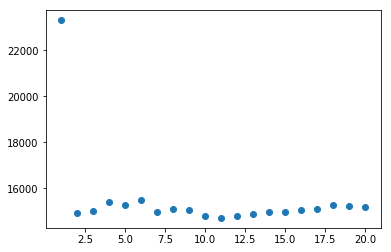

In [17]:
plt.scatter(hyper_params, mse_values)
plt.show()

## general workflow for finding the best model is:
<ol>
<li>select relevant features to use for predicting the target column.</li>
<li>use grid search to find the optimal hyperparameter value for the selected features.</li>
<li>evaluate the model's accuracy and repeat the process.</li>
</ol>

In [18]:
def cal_mse(features):
    mse_values = []
    for k in hyper_params:
        knn = KNeighborsRegressor(n_neighbors=k, algorithm='brute')
        knn.fit(train_df[features], train_df['price'])
        predictions = knn.predict(test_df[features])
        mse = mean_squared_error(predictions, test_df['price'])
        mse_values.append(mse)
    return mse_values

In [19]:
two_features = ['accommodates', 'bathrooms']
three_features = ['accommodates', 'bathrooms', 'bedrooms']
hyper_params = range(1, 21)
two_features_mse = cal_mse(two_features)
three_features_mse = cal_mse(three_features)

In [21]:
two_features_min_mse = min(two_features_mse)
two_features_opt_k = two_features_mse.index(two_features_min_mse) + 1
two_hyp_mse = {}
two_hyp_mse[two_features_opt_k] = two_features_min_mse
print(two_hyp_mse)

{5: 14790.314266211606}


In [22]:
def cal_hyp_mse(mse):
    min_mse = min(mse)
    opt_k = mse.index(min_mse) + 1
    hyp_mse = {}
    hyp_mse[opt_k] = min_mse
    return hyp_mse

In [23]:
two_hyp_mse = cal_hyp_mse(two_features_mse)
three_hyp_mse = cal_hyp_mse(three_features_mse)
print(two_hyp_mse)
print(three_hyp_mse)

{5: 14790.314266211606}
{7: 13518.769009310208}
